In [1]:
import pandas as pd

df = pd.read_csv("/Users/sadiazaman/Downloads/Summer 2025/NLP/Project/track-a.csv") 
df.head()


,id,text,anger,fear,joy,sadness,surprise
0,eng_train_track_a_00001,"Colorado, middle of nowhere.",0,1,0,0,1
1,eng_train_track_a_00002,This involved swimming a pretty large lake tha...,0,1,0,0,0
2,eng_train_track_a_00003,It was one of my most shameful experiences.,0,1,0,1,0
3,eng_train_track_a_00004,"After all, I had vegetables coming out my ears...",0,0,0,0,0
4,eng_train_track_a_00005,Then the screaming started.,0,1,0,1,1


In [3]:
# Check the Structure

print(df.columns)
print(df.info())
print(df.describe())


Index(['id', 'text', 'anger', 'fear', 'joy', 'sadness', 'surprise'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        2768 non-null   object
 1   text      2768 non-null   object
 2   anger     2768 non-null   int64 
 3   fear      2768 non-null   int64 
 4   joy       2768 non-null   int64 
 5   sadness   2768 non-null   int64 
 6   surprise  2768 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 151.5+ KB
None
             anger         fear          joy      sadness     surprise
count  2768.000000  2768.000000  2768.000000  2768.000000  2768.000000
mean      0.120303     0.582009     0.243497     0.317197     0.303107
std       0.325375     0.493318     0.429270     0.465469     0.459684
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000     0.0000

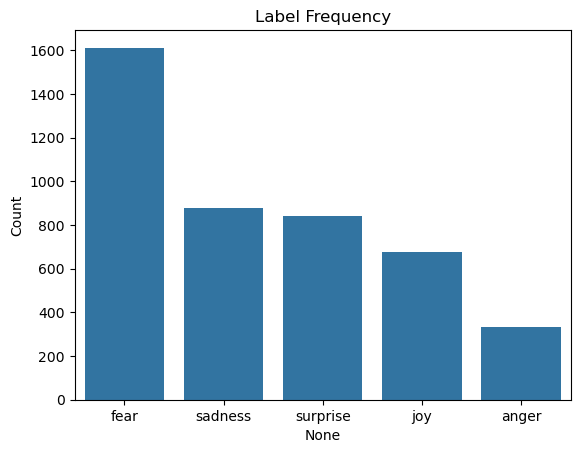

In [5]:
#Label Distribution (Basic Count)

import matplotlib.pyplot as plt
import seaborn as sns

label_cols = ['anger', 'fear', 'joy', 'sadness', 'surprise']
label_counts = df[label_cols].sum().sort_values(ascending=False)

sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Label Frequency")
plt.ylabel("Count")
plt.show()


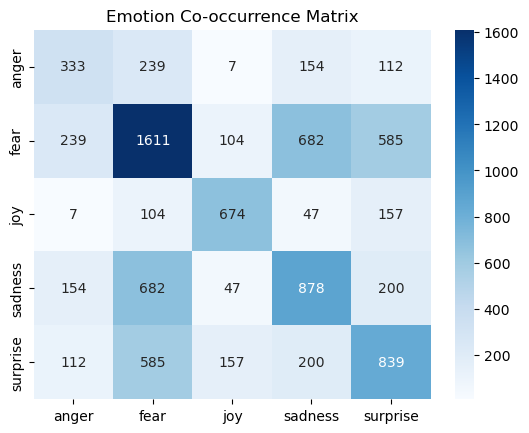

In [7]:
#Label Co-occurrence Matrix

co_matrix = df[label_cols].T.dot(df[label_cols])

sns.heatmap(co_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Emotion Co-occurrence Matrix")
plt.show()


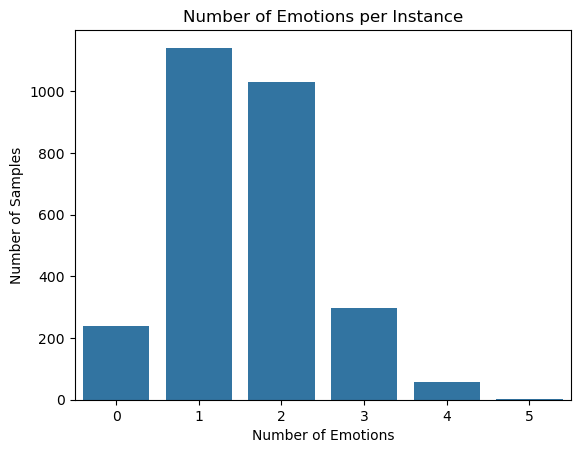

In [11]:
#Multi-label Count Per Instance

df['label_count'] = df[label_cols].sum(axis=1)
label_count_dist = df['label_count'].value_counts().sort_index()

sns.barplot(x=label_count_dist.index, y=label_count_dist.values)
plt.title("Number of Emotions per Instance")
plt.xlabel("Number of Emotions")
plt.ylabel("Number of Samples")
plt.show()


In [13]:
#Examples of Multi-label Sentences
multi_label_examples = df[df['label_count'] > 1][['text'] + label_cols].head(5)
print(multi_label_examples)


                                                text  anger  fear  joy  \
0                       Colorado, middle of nowhere.      0     1    0   
2        It was one of my most shameful experiences.      0     1    0   
4                        Then the screaming started.      0     1    0   
5  They don't fear death, and it seems they belie...      0     1    0   
6  You know what happens when I get one of these ...      1     1    0   

   sadness  surprise  
0        0         1  
2        1         0  
4        1         1  
5        0         1  
6        0         0  


In [15]:
richer_multi_label = df[df['label_count'] >= 3][['text'] + label_cols]
print(richer_multi_label.head())


                                                 text  anger  fear  joy  \
4                         Then the screaming started.      0     1    0   
34                        Sets the power/entity free.      0     1    1   
36  There was apparently then some awkward laughte...      1     1    0   
38                               I got lie after lie.      1     1    0   
62  This expert also was the ex-husband of the mur...      0     1    0   

    sadness  surprise  
4         1         1  
34        0         1  
36        1         1  
38        1         0  
62        1         1  


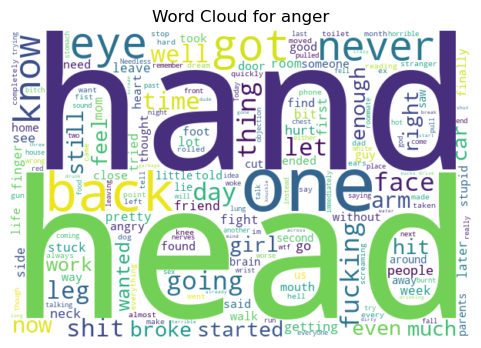

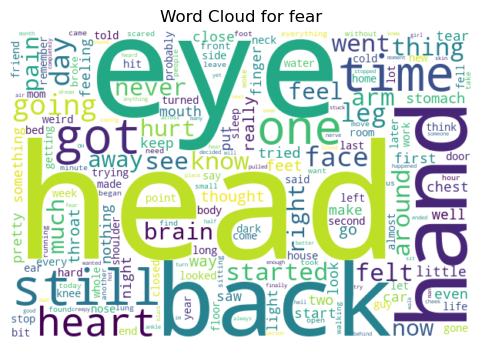

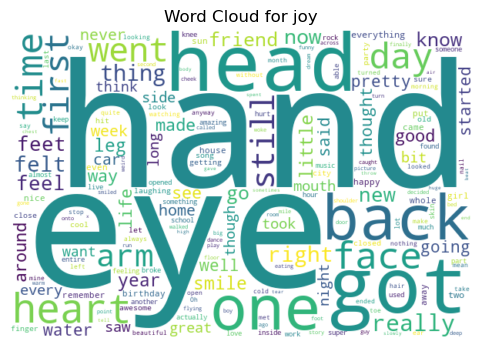

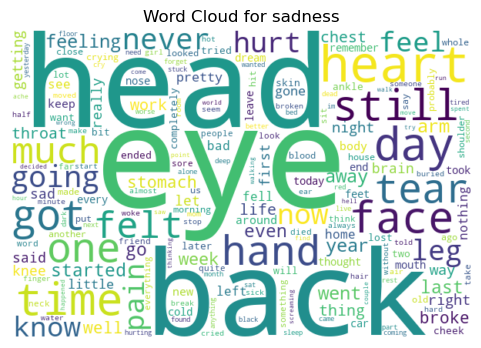

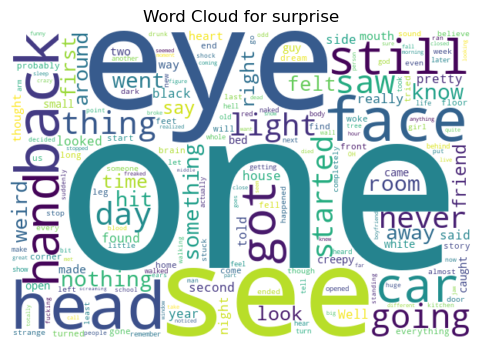

In [24]:
#Word Cloud for Each Emotion
from wordcloud import WordCloud

for emotion in label_cols:
    text = " ".join(df[df[emotion] == 1]['text'])
    wc = WordCloud(width=600, height=400, background_color='white').generate(text)
    plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {emotion}")
    plt.show()


In [22]:
!pip install wordcloud


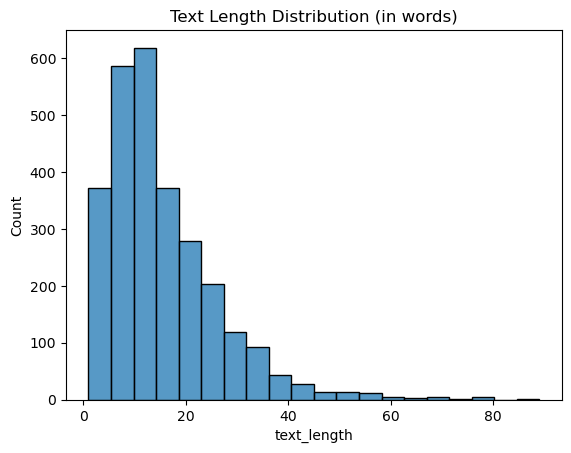

In [27]:
#Text length distribution

df['text_length'] = df['text'].apply(lambda x: len(x.split()))
sns.histplot(df['text_length'], bins=20)
plt.title("Text Length Distribution (in words)")
plt.show()
